In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

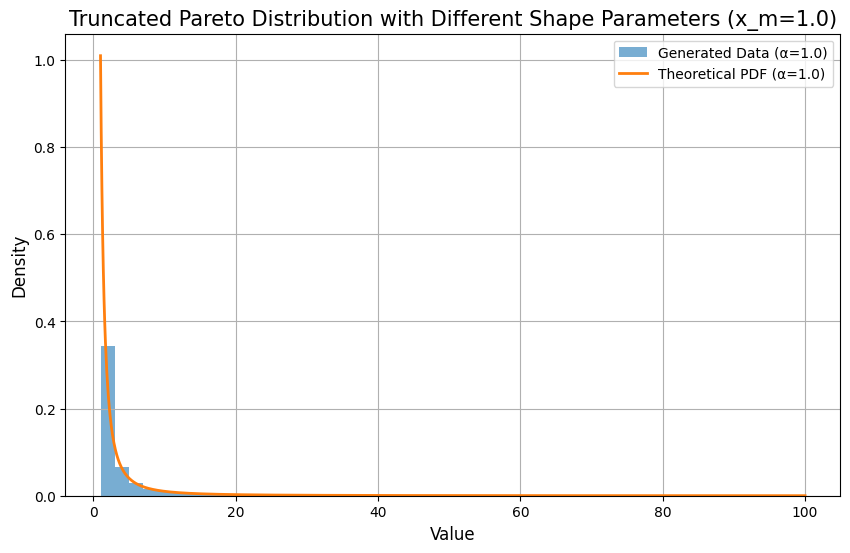

In [2]:
# 参数设置
shapes = [0.2, 0.3, 0.5, 1.0, 2.0]  # 不同的形状参数 alpha
scale = 1.0  # 尺度参数 x_m
data_min = 1.0  # 数据最小值
data_max = 100.0  # 数据最大值
size = 10000  # 生成的随机数数量

# 截断帕累托分布的逆 CDF
def truncated_pareto_ppf(u, shape, scale, data_min, data_max):
    cdf_min = 1 - (scale / data_min) ** shape
    cdf_max = 1 - (scale / data_max) ** shape
    return scale / (1 - (cdf_min + u * (cdf_max - cdf_min))) ** (1 / shape)

# 创建图形
plt.figure(figsize=(10, 6))

# 为每个形状参数生成数据并绘制 PDF
for shape in shapes:
    # 生成均匀分布的随机数
    u = np.random.uniform(0, 1, size)
    
    # 通过逆 CDF 生成截断帕累托分布数据
    samples = truncated_pareto_ppf(u, shape, scale, data_min, data_max)
    
    # 绘制直方图
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f'Generated Data (α={shape})')
    
    # 计算理论上的截断帕累托 PDF
    x = np.linspace(data_min, data_max, 1000)  # x 范围
    pdf = (shape * (scale ** shape)) / (x ** (shape + 1))  # 标准帕累托 PDF
    cdf_min = 1 - (scale / data_min) ** shape
    cdf_max = 1 - (scale / data_max) ** shape
    pdf_normalized = pdf / (cdf_max - cdf_min)  # 归一化
    
    # 绘制理论 PDF
    plt.plot(x, pdf_normalized, lw=2, label=f'Theoretical PDF (α={shape})')

# 添加标题和标签
plt.title('Truncated Pareto Distribution with Different Shape Parameters (x_m={})'.format(scale), fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

Original distribution: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

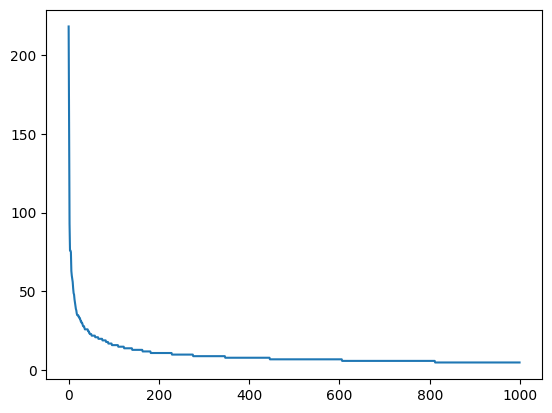

In [2]:
def generate_pareto_distribution(num_warehouses, total_regions, alpha=2.0):
    """
    使用帕累托分布生成每个仓库的地区数量
    
    :param num_warehouses: 仓库数量
    :param total_regions: 总地区数量
    :param alpha: 帕累托分布的 shape 参数，值越大分布越陡峭
    :return: 每个仓库的地区数量列表
    """
    # 1. 生成帕累托分布的随机数
    raw_pareto_values = np.random.pareto(alpha, num_warehouses) + 1  # 帕累托分布随机数 (shifted to start at 1)
    
    # 2. 归一化处理，将帕累托值映射到总地区数量
    sum_pareto_values = sum(raw_pareto_values)
    regions = [int(value / sum_pareto_values * total_regions) for value in raw_pareto_values]
    
    # 3. 确保每个仓库至少分配一个地区
    for i in range(len(regions)):
        if regions[i] == 0:
            regions[i] = 1
    
    # 4. 调整总数，确保总地区数量等于 total_regions
    current_total = sum(regions)
    difference = total_regions - current_total

    # 根据差值调整分配
    if difference > 0:
        # 如果差值为正，多余的地区随机分配
        for _ in range(difference):
            index = random.randint(0, num_warehouses - 1)
            regions[index] += 1
    elif difference < 0:
        # 如果差值为负，减少多余的地区
        for _ in range(-difference):
            index = random.randint(0, num_warehouses - 1)
            if regions[index] > 1:  # 确保每个仓库至少有一个地区
                regions[index] -= 1

    # 5. 返回最终地区分布
    return regions

# 示例使用
num_warehouses = 1000
result = generate_pareto_distribution(num_warehouses, num_warehouses*10, alpha=2)
print(f"Original distribution: {[10] * num_warehouses}")
print(f"Pareto distribution (sorted): {sorted(result, reverse=True)}")
print(f"Sum of regions: {sum(result)}")  # 总数应该保持不变
# plot sorted result
plt.plot(sorted(result, reverse=True))
## plot sorted result
# plt.plot(result)

/tmp/ipykernel_1085126/3421730631.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([group1, group2], labels=["1G", "128M"], patch_artist=True)  # 绘制箱型图


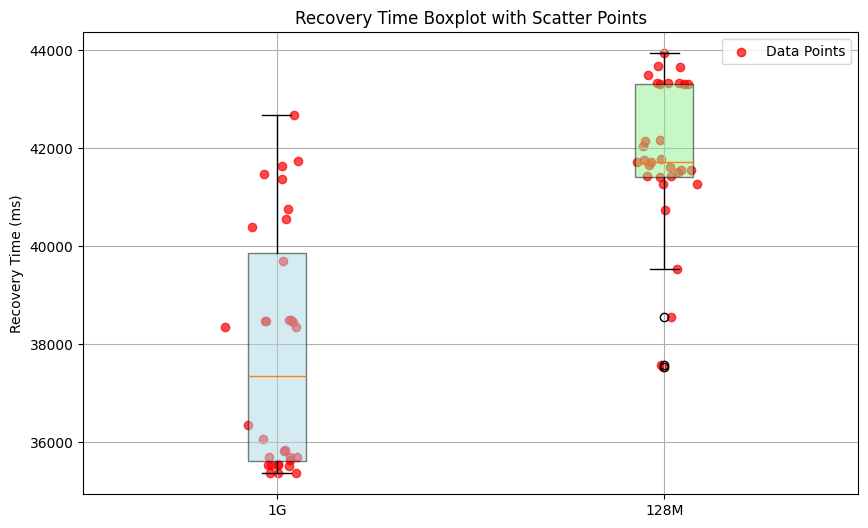

In [3]:
# 第一组 recovery time 数据
group1 = [
    36062, 35377, 38355, 41375, 35711, 35530, 39700, 40547, 36364, 40756,
    35546, 35531, 35851, 41474, 38453, 41640, 35710, 38490, 38470, 35830,
    38488, 40382, 42684, 35647, 41741, 35702, 35372, 38476, 35380, 38347,
    35538, 35552
]

# 第二组 recovery time 数据
group2 = [
    43321, 39526, 40747, 37576, 43313, 42155, 43484, 41761, 41649, 41429,
    41262, 43325, 43318, 41424, 41409, 43670, 43933, 41277, 37542, 42043,
    41608, 41717, 43650, 42165, 41511, 41711, 41558, 43315, 38567, 43309,
    41555, 41772
]

# 创建图形
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制箱型图
boxplot = plt.boxplot([group1, group2], labels=["1G", "128M"], patch_artist=True)  # 绘制箱型图

# 为箱型图添加颜色和透明度
colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # 设置透明度

# 在箱型图上叠加绘制离散点
for i, group in enumerate([group1, group2], 1):
    # 为每个点添加一些随机抖动（jitter）以避免重叠
    x = np.random.normal(i, 0.04, size=len(group))  # i 是箱型图的位置，0.04 是抖动的幅度
    plt.scatter(x, group, color='red', alpha=0.7, label='Data Points' if i == 1 else "")  # 绘制散点

plt.title("Recovery Time Boxplot with Scatter Points")  # 设置标题
plt.ylabel("Recovery Time (ms)")  # 设置 y 轴标签
plt.grid(True)  # 添加网格
plt.legend()  # 显示图例

# 显示图形
plt.show()